# PHYS 541 Assignment 4 Question 3

Beginning with the bikeshare_final.ipynb notebook in the Week7and8 folder, create a bikeshare system that models THREE locations (rather than just two).  Assuming the locations are called A, B, and C, use the following parameters:  total number of bikes = 100, p_AB = 0.3, p_BA=0.2, p_AC = 0.4, p_CA=0.1, p_BC=0.35, p_CB=0.15.  Try to determine the optimum initial configuration of the 100 bikes between the three locations such that the number of unsatisfied customers will be minimized over a three-hour period of bike sharing.

As a suggestion, try some configurations in steps of 10 bikes for the initial configuration, for example, try A = 10, B = 30, C = 60, and compare that to A = 10, B = 60, C = 30.  This may help you understand where the optimum configuration might be located in the (A,B,C) space.


In [7]:
from modsim import *
import pandas as pd

In [8]:
def step(state, p_ab, p_ba, p_ac, p_ca, p_bc, p_cb):
    if flip(p_ab):
        bike_from_a_to_b(state)
        
    if flip(p_ba):
        bike_from_b_to_a(state)
        
    if flip(p_ac):
        bike_from_a_to_c(state)
        
    if flip(p_ca):
        bike_from_c_to_a(state)
    
    if flip(p_bc):
        bike_from_b_to_c(state)
        
    if flip(p_cb):
        bike_from_c_to_b(state)

def bike_from_a_to_b(state):
    if state.a == 0:
        state.a_empty += 1
        return
    state.a -= 1
    state.b += 1

def bike_from_b_to_a(state):
    if state.b == 0:
        state.b_empty += 1
        return
    state.b -= 1
    state.a += 1

def bike_from_c_to_b(state):
    if state.c == 0:
        state.c_empty += 1
        return
    state.c -= 1
    state.b += 1

def bike_from_a_to_c(state):
    if state.a == 0:
        state.a_empty += 1
        return
    state.a -= 1
    state.c += 1

def bike_from_b_to_c(state):
    if state.b == 0:
        state.b_empty += 1
        return
    state.b -= 1
    state.c += 1

def bike_from_c_to_a(state):
    if state.c == 0:
        state.c_empty += 1
        return
    state.c -= 1
    state.a += 1

In [9]:
def run_simulation(state, p_ab, p_ba, p_ac, p_ca, p_bc, p_cb, num_steps, do_plot=True):
    """
    Simulate the number of given time steps
    
    :param state: State object
    :param p_ab: probability of bike from a to b 
    :param p_ba: probability of bike from b to a
    :param p_ac: probability of bike from a to c
    :param p_ca: probability of bike from c to a
    :param p_bc: probability of bike from b to c
    :param p_cb: probability of bike from c to b
    :param num_steps: number of time steps to simulate
    :param do_plot: Boolean flag indicating whether to plot the results
    :return: number of total unsatisfied customers
    """
    # Set up time series
    results_a = TimeSeries()
    results_b = TimeSeries()
    results_c = TimeSeries()
    # Initial conditions
    results_a[0] = state.a
    results_b[0] = state.b
    results_c[0] = state.c
    results_a_unsatisfied = TimeSeries()
    results_b_unsatisfied = TimeSeries()
    results_c_unsatisfied = TimeSeries()
    results_a_unsatisfied[0] = state.a_empty
    results_b_unsatisfied[0] = state.b_empty
    results_c_unsatisfied[0] = state.c_empty
    
    for i in range(num_steps):
        step(state, p_ab, p_ba, p_ac, p_ca, p_bc, p_cb)
        results_a[i+1] = state.a
        results_b[i+1] = state.b
        results_c[i+1] = state.c
        results_a_unsatisfied[i+1] = state.a_empty
        results_b_unsatisfied[i+1] = state.b_empty
        results_c_unsatisfied[i+1] = state.c_empty
    
    if do_plot:
        fig, ax = plt.subplots(1, 2, figsize=(12,6))
        ax[0].plot(results_a, label='a')
        ax[0].plot(results_b, label='b')
        ax[0].plot(results_c, label='c')
        ax[0].set_xlabel('Time step (min)')
        ax[0].set_ylabel('Number of bikes')
        ax[0].legend()
        ax[1].plot(results_a_unsatisfied, label='a')
        ax[1].plot(results_b_unsatisfied, label='b')
        ax[1].plot(results_c_unsatisfied, label='c')
        ax[1].set_xlabel('Time step (min)')
        ax[1].set_ylabel('Number of unsatisfied customers')
        ax[1].legend()
        plt.show()
    
    return results_a_unsatisfied[num_steps-1] + results_b_unsatisfied[num_steps-1] + results_c_unsatisfied[num_steps-1]

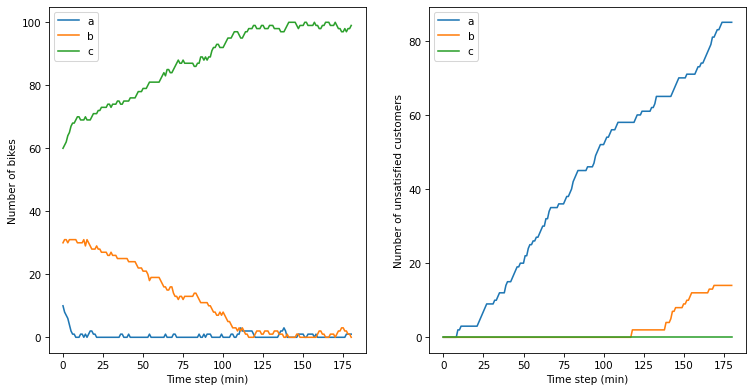

In [10]:
p_ab = 0.3
p_ba = 0.2
p_ac = 0.4
p_ca = 0.1
p_bc = 0.35
p_cb = 0.15

num_slots = 100  # Number of total bikes
num_steps = 180  # 3 hours

bikeshare = State(a = 10, b = 30, c = 60, a_empty=0, b_empty=0, c_empty=0)
total_unsatisfied = run_simulation(bikeshare, p_ab, p_ba, p_ac, p_ca, p_bc, p_cb, num_steps)

In [11]:
use_csv = True
if use_csv:
    state_results = pd.read_csv('question3.csv')
else:
    # Brute force this thing (and then save it to a csv, so I don't have to do it again)
    increment = 10
    num_sims = 100
    
    data = {
        "a": [],
        "b": [],
        "c": [],
        "unsatisfied": []
    }
    state_results = pd.DataFrame(data)
    loc = 0
    
    for a in range(0, num_slots+increment, increment):
        for b in range(0, num_slots+increment, increment):
            for c in range(0, num_slots+increment, increment):
                # Quite a nested for loop here
                # Many of these iterations will not have the correct number of bikes, so check first
                if (a+b+c) == num_slots:
                    state = {'a': a, 'b': b, 'c': c}
                    tu_sum = 0
                    for i in range(num_sims):
                        bikeshare = State(a = a, b = c, c = c, a_empty=0, b_empty=0, c_empty=0)
                        tu_sum += run_simulation(bikeshare, p_ab, p_ba, p_ac, p_ca, p_bc, p_cb, num_steps, do_plot=False)
                    tu_avg = tu_sum / num_sims
                    state['unsatisfied'] = tu_avg
                    print(state)
                    state_results.loc[loc] = [a, b, c, tu_avg]
                    loc += 1
    
    state_results.to_csv('question3.csv')

best state: a = 80.0 b = 0.0 c = 20.0


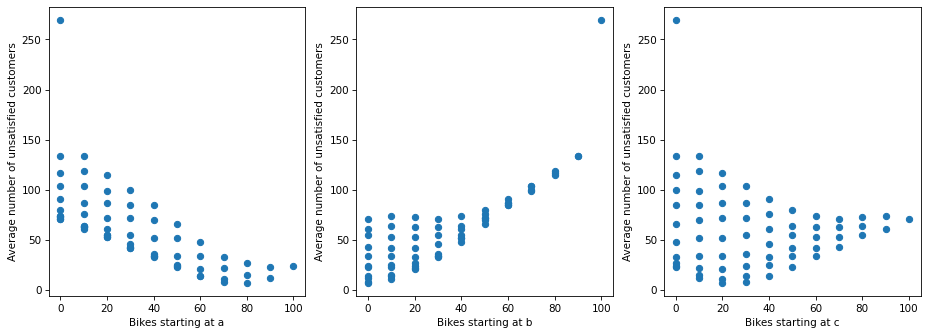

In [12]:
best_state_index = state_results.sort_values('unsatisfied').index[0]
best_state = state_results.loc[best_state_index]
print(f"best state: a = {best_state.a} b = {best_state.b} c = {best_state.c}")

fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].plot(state_results['a'], state_results['unsatisfied'], 'o',)
ax[0].set_xlabel('Bikes starting at a')
ax[0].set_ylabel('Average number of unsatisfied customers')
ax[1].plot(state_results['b'], state_results['unsatisfied'], 'o',)
ax[1].set_xlabel('Bikes starting at b')
ax[1].set_ylabel('Average number of unsatisfied customers')
ax[2].plot(state_results['c'], state_results['unsatisfied'], 'o',)
ax[2].set_xlabel('Bikes starting at c')
ax[2].set_ylabel('Average number of unsatisfied customers')
plt.show()

The state with the minimal number of unsatisfied customers seems to be when a starts with 80, b with 0, and c with 20.

The above figure shows that the system performs better overall as a has more bikes, b has almost no bikes, and c has the remainder. The plots gives some idea of the variations you can see. Giving many bikes to b at the start seems to always be a bad idea. Giving more bikes to a is generally a good idea. Station c is more of a wildcard.